## Description
This is to demonstrate the use of neural network for binary classification.
The data is a set of IMDB movie reviews. Each review contains specific words,
based on which the neural network classifies any review as positive or negative.
In other words, the network performs sentiment analysis on the reviews data.

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7355 - loss: 0.5895 - val_accuracy: 0.8670 - val_loss: 0.3663
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8940 - loss: 0.3227 - val_accuracy: 0.8790 - val_loss: 0.2826
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9225 - loss: 0.2325 - val_accuracy: 0.8900 - val_loss: 0.2528
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9336 - loss: 0.1932 - val_accuracy: 0.8860 - val_loss: 0.2503
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9432 - loss: 0.1630 - val_accuracy: 0.8870 - val_loss: 0.2603
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9534 - loss: 0.1426 - val_accuracy: 0.8780 - val_loss: 0.2986
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9564 - loss: 0.1326 - val_accuracy: 0.8870 - val_loss: 0.2748
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9632 - loss: 0.1168 - val_accuracy: 0.8840 - val_loss

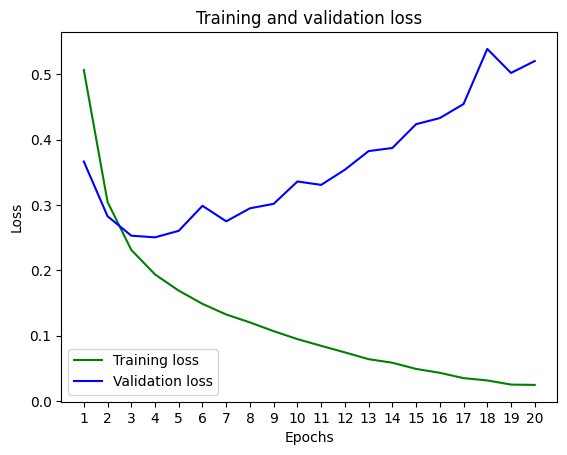

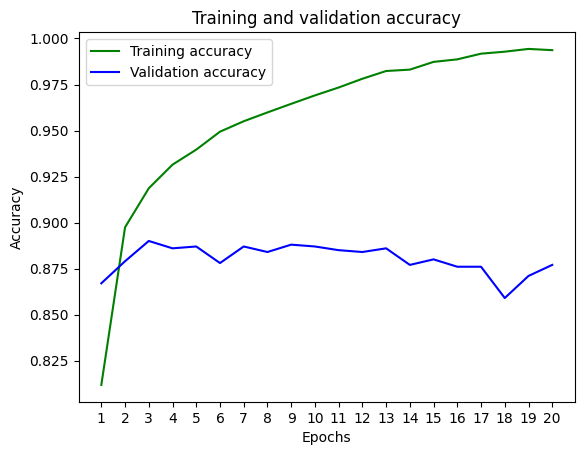

In [28]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras import layers
from keras import models
from keras import optimizers
import numpy as np

%matplotlib inline 

def vectorize(seq, dim):

    vec = np.zeros((len(seq), dim))

    for i, s in enumerate(seq):
        vec[i,s] = 1

    return vec

n_words = 10000

# load review data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=n_words)

# vectorize the training and testing data
# before being loaded into the network
x_train_vec = vectorize(train_data, n_words)
x_test_vec = vectorize(test_data, n_words)

# also vectorize data labels
y_train_vec = np.asarray(train_labels).astype('float32')
y_test_vec = np.asarray(test_labels).astype('float32')

# split validation set from the original training set
x_valid = x_train_vec[:1000]
x_train = x_train_vec[1000:]

y_valid = y_train_vec[:1000]
y_train = y_train_vec[1000:]

# initialize the network model
model =  models.Sequential()
model.add(layers.Input(shape=(n_words,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) # sigmoid for positive/negative classification (logit regression)

# compile the model
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=0.001),
    loss='binary_crossentropy', # final classification is binary
    metrics=['accuracy']
)

# train the model with the data and labels
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=512,
    validation_data=(
        x_valid,
        y_valid
    )
)

# evaluate the model
test_loss, test_acc = model.evaluate(x_valid, y_valid)
print('Test loss:', round(test_loss, 4), 'Test accuracy:', round(test_acc, 4))

history_loss = history.history['loss']
history_val_loss = history.history['val_loss']
epochs=range(1, len(history_loss) + 1)

plt.plot(epochs, history_loss, 'g', label='Training loss')
plt.plot(epochs, history_val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.legend()
plt.show()

# clear prev plot
plt.clf()

history_accuracy = history.history['accuracy']
history_val_accuracy = history.history['val_accuracy']

plt.plot(epochs, history_accuracy, 'g', label='Training accuracy')
plt.plot(epochs, history_val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.xticks(epochs)
plt.legend()
plt.show()